In [29]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.append("../../../")
import src.SupportPreProcesamiento as pre

pd.set_option('display.float_format', '{:.2f}'.format)


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)


In [30]:
df = pd.read_pickle("../../../datos/02_regresiones/cluster_1/01_datos_cluster1.pkl")
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
312329,49359,UP-2013-6590,22-02-2013,27-02-2013,Standard Class,BF-975,Barbara Fisher,Corporate,L'viv,L'viv,Ukraine,NaN,EMEA,EMEA,OFF-IBI-10001772,Office Supplies,Binders,"Ibico Index Tab, Clear",16.74,2,0.00,6.18,1.57,Medium


In [31]:
pre.exploracion_dataframe(df,"Profit")

El número de datos es 78066 y el de columnas es 24

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 68066

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Postal Code,100.00



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
City,object
State,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna ORDER ID tiene las siguientes valore únicos:


,count
Order ID,
EZ-2014-8460,102
SG-2013-6790,101
NI-2014-8880,97
MG-2012-4560,95
NI-2012-4860,95


La columna ORDER DATE tiene las siguientes valore únicos:


,count
Order Date,
18-11-2014,378
18-06-2014,370
15-11-2012,369
23-06-2014,262
13-11-2013,254


La columna SHIP DATE tiene las siguientes valore únicos:


,count
Ship Date,
16-06-2014,352
23-06-2014,286
23-11-2014,276
18-12-2013,266
13-05-2014,251


La columna SHIP MODE tiene las siguientes valore únicos:


,count
Ship Mode,
Standard Class,45793
Second Class,16331
First Class,11376
Same Day,4566


La columna CUSTOMER ID tiene las siguientes valore únicos:


,count
Customer ID,
RA-9285,280
DV-3045,280
CC-2220,272
EL-3735,271
RE-9450,265


La columna CUSTOMER NAME tiene las siguientes valore únicos:


,count
Customer Name,
Ralph Arnett,280
Darrin Van Huff,280
Chris Cortes,272
Ed Ludwig,271
Richard Eichhorn,265


La columna SEGMENT tiene las siguientes valore únicos:


,count
Segment,
Consumer,39820
Corporate,23397
Home Office,14849


La columna CITY tiene las siguientes valore únicos:


,count
City,
Istanbul,2481
Lagos,2464
Cairo,1867
Kinshasa,1470
Baghdad,1360


La columna STATE tiene las siguientes valore únicos:


,count
State,
Istanbul,3383
Lagos,2464
Gauteng,1985
Al Qahirah,1867
Ontario,1591


La columna COUNTRY tiene las siguientes valore únicos:


,count
Country,
Turkey,10937
Nigeria,6953
Iran,4707
Egypt,3926
Morocco,3559


La columna MARKET tiene las siguientes valore únicos:


,count
Market,
EMEA,39224
Africa,35659
Canada,3183


La columna REGION tiene las siguientes valore únicos:


,count
Region,
EMEA,39224
Africa,35659
Canada,3183


La columna PRODUCT ID tiene las siguientes valore únicos:


,count
Product ID,
OFF-BIN-10002061,529
OFF-STA-10001791,484
OFF-STA-10001747,441
OFF-FEL-10001865,400
OFF-CAR-10001577,400


La columna CATEGORY tiene las siguientes valore únicos:


,count
Category,
Office Supplies,61323
Technology,9896
Furniture,6847


La columna SUB-CATEGORY tiene las siguientes valore únicos:


,count
Sub-Category,
Art,17627
Binders,16672
Storage,15076
Phones,3499
Furnishings,2511


La columna PRODUCT NAME tiene las siguientes valore únicos:


,count
Product Name,
"Stanley Pencil Sharpener, Water Color",541
"Binney & Smith Sketch Pad, Blue",529
"Stanley Highlighters, Water Color",484
"Smead File Cart, Single Width",458
"Cardinal Index Tab, Clear",452


La columna ORDER PRIORITY tiene las siguientes valore únicos:


,count
Order Priority,
Medium,44604
High,23579
Critical,6265
Low,3618


# Conclusiones
- VR: Profit
- Eliminar Postal Code (Demasiados Nulos)
- Eliminamos: ['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','City','State','Country','Postal Code','Product ID','Product Name']

In [32]:
cols_chao = ['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','City','State','Country','Postal Code','Product ID','Product Name']
df.drop(columns=cols_chao, inplace=True)

In [33]:
df.sample()

,Ship Mode,Segment,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
160995,First Class,Corporate,Africa,Africa,Furniture,Chairs,81.42,1,0.00,38.25,9.44,Medium


# Visualicemos las Variables

In [34]:
numericas, categoricas = pre.separarar_df(df)

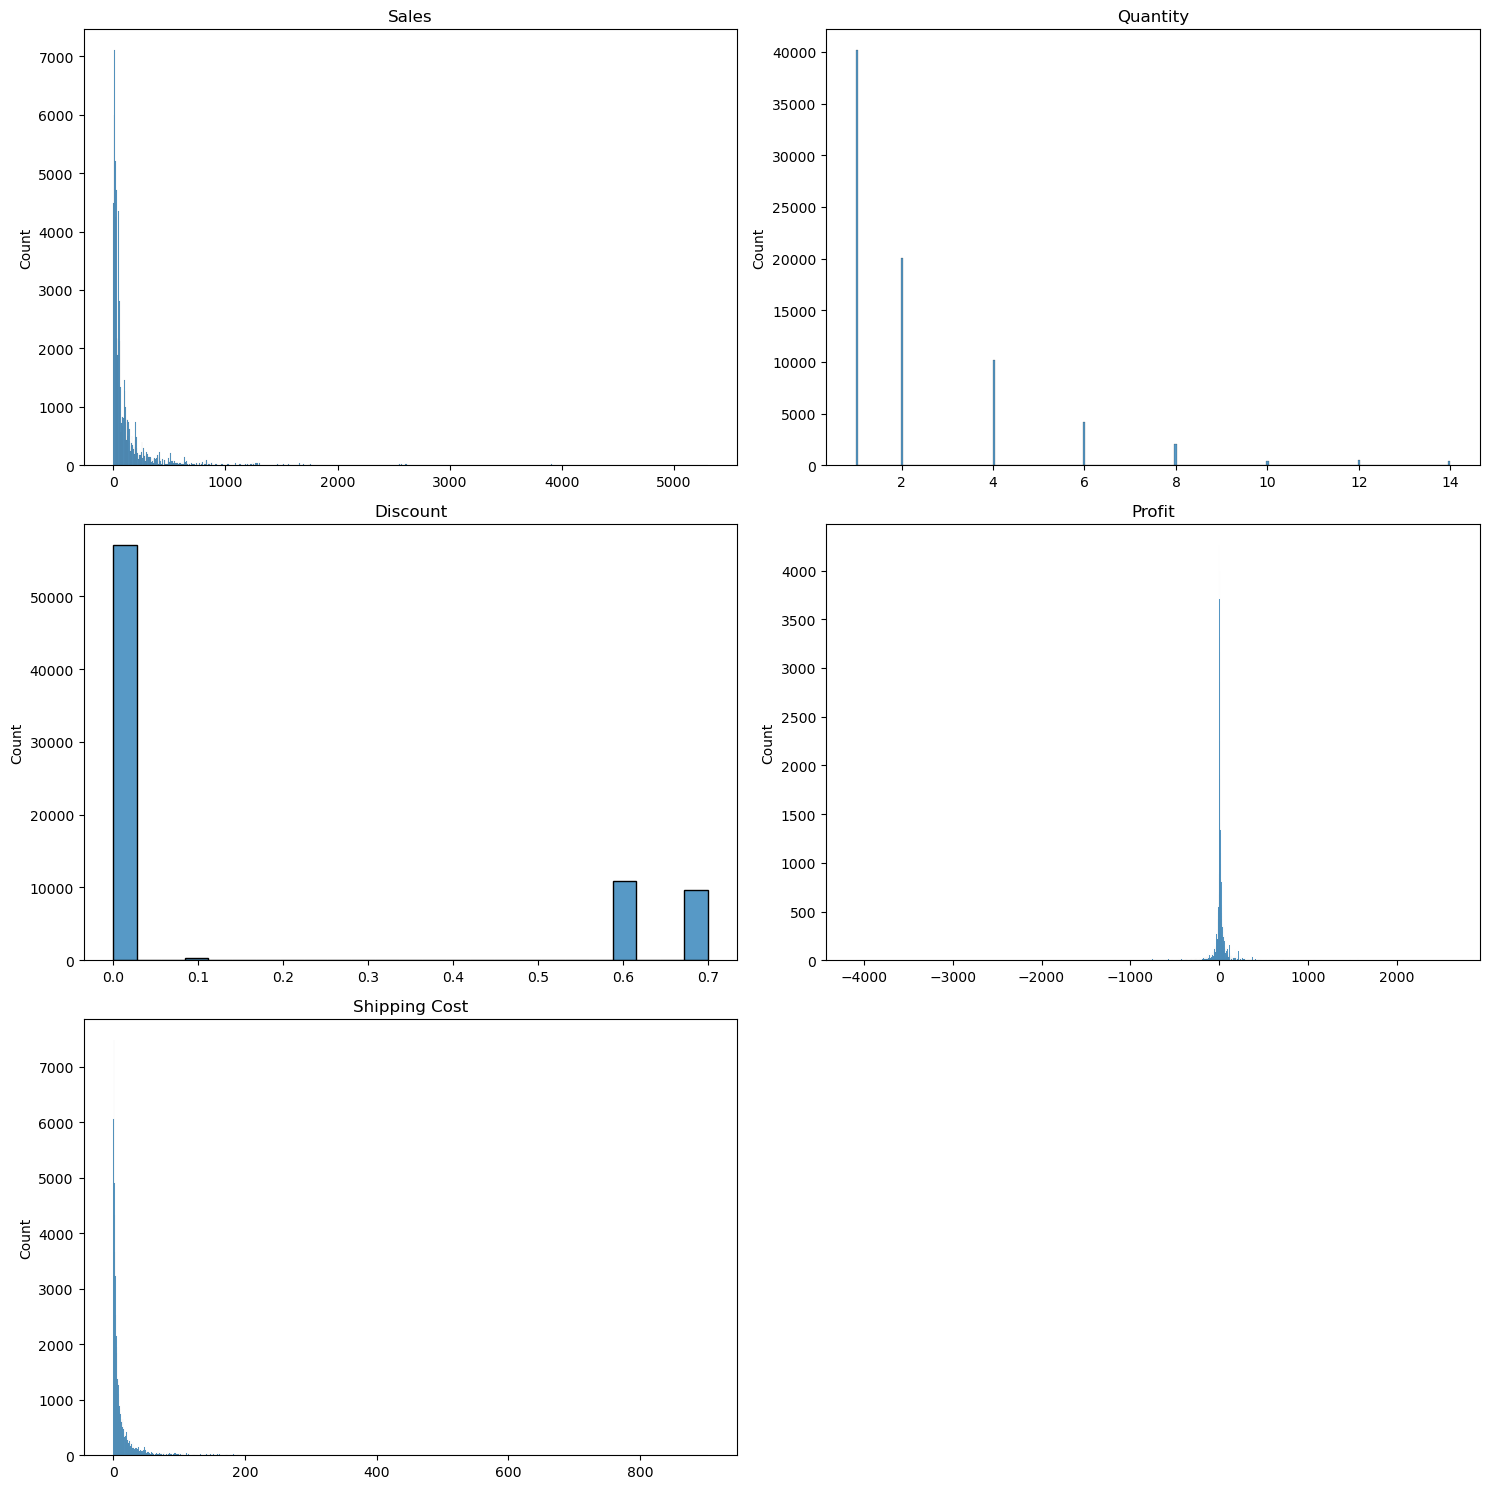

In [35]:
pre.plot_numericas(numericas,grafica_size=(15,15))

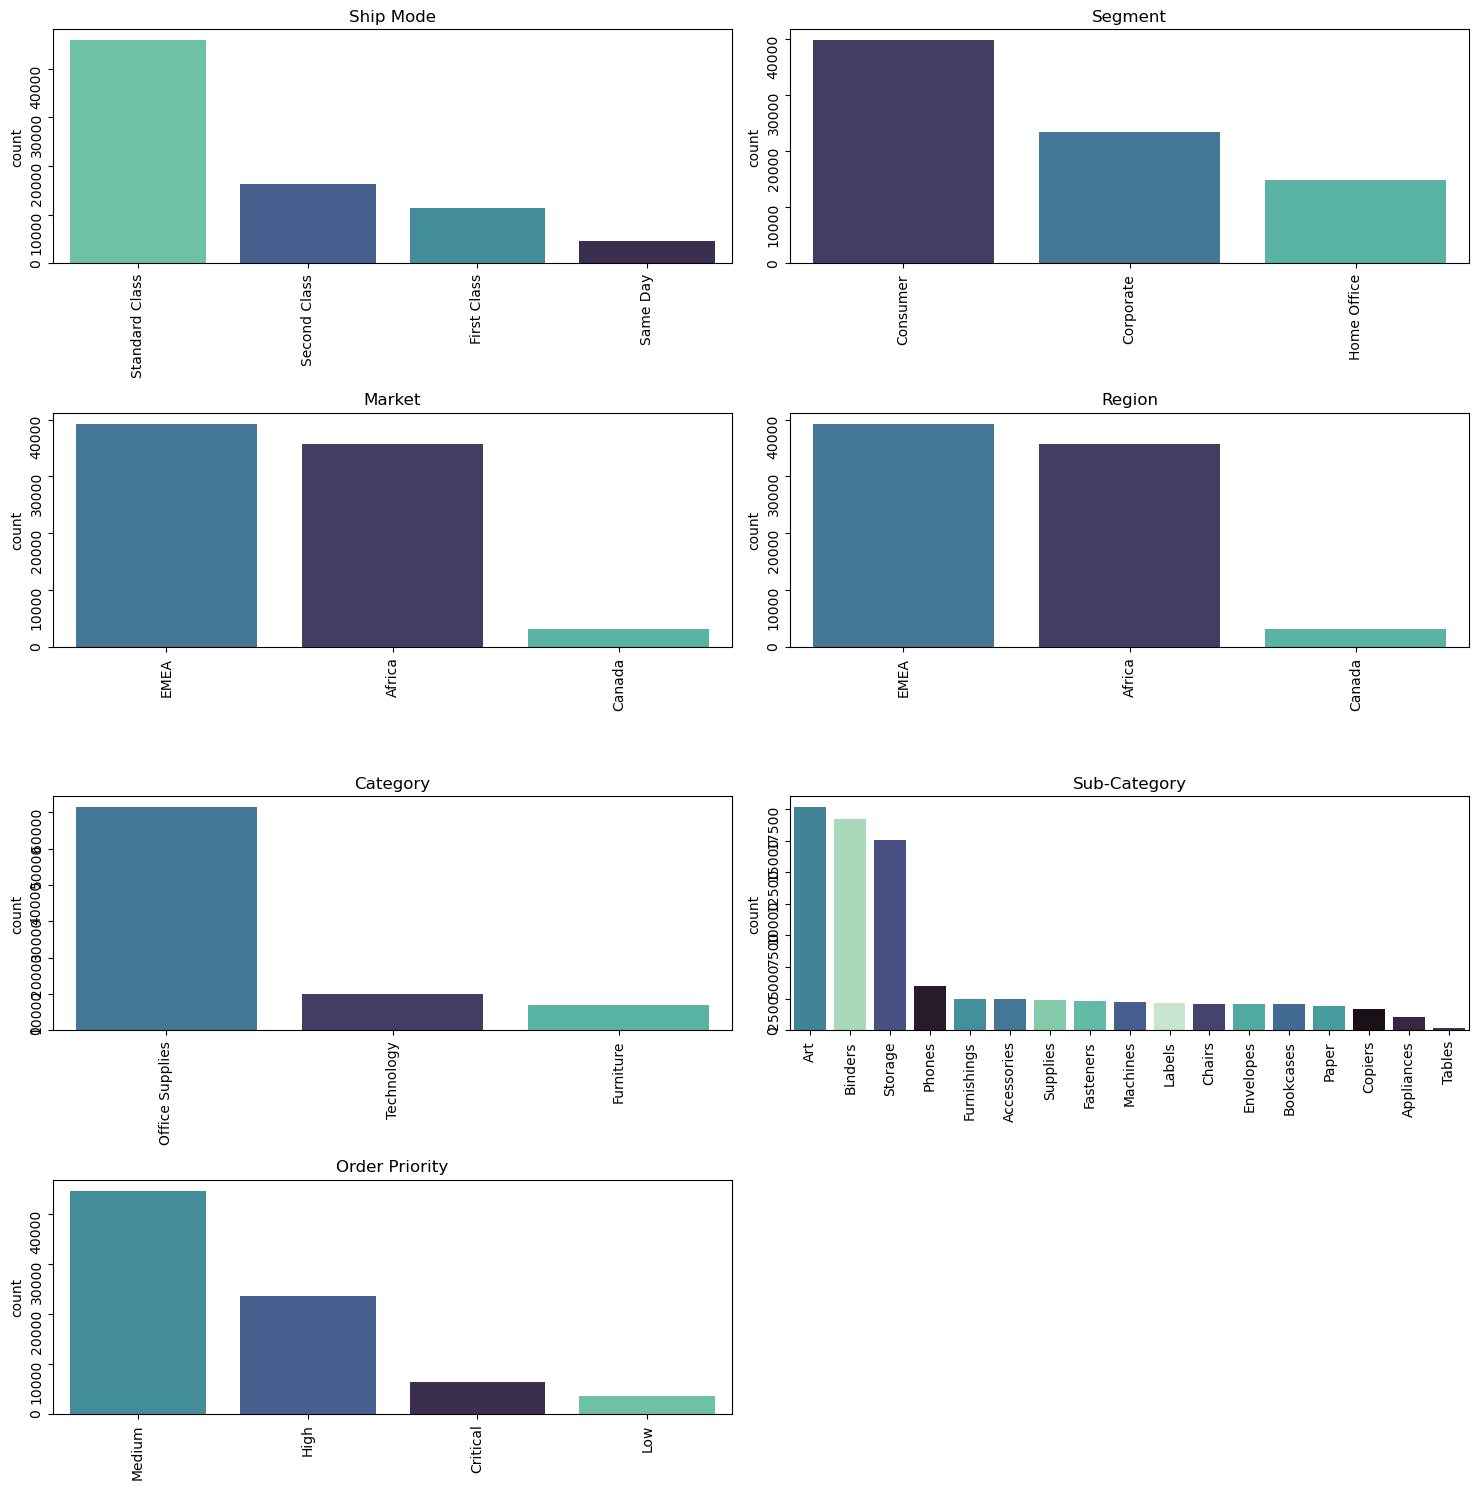

In [36]:
pre.plot_categoricas(categoricas,grafica_size=(15,15))

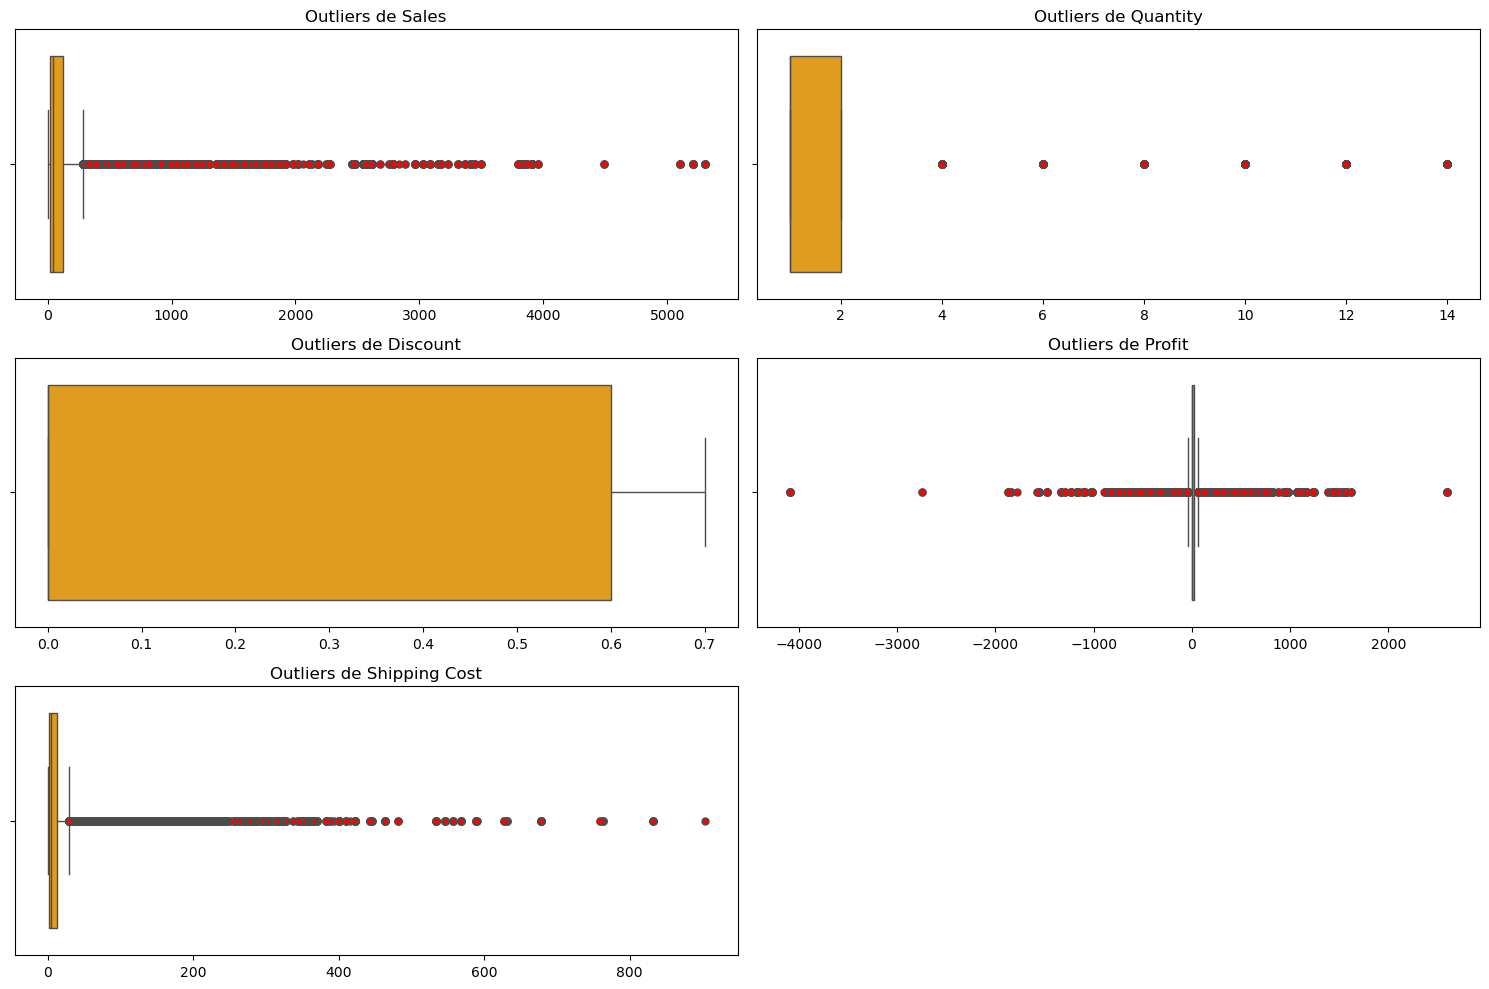

In [37]:
pre.detectar_outliers(df)

# Correlación

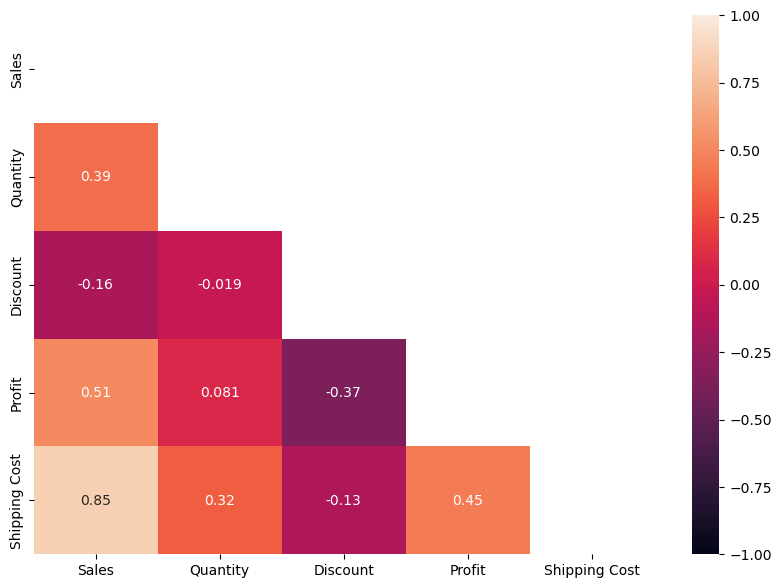

In [38]:
pre.matriz_correlacion(df)

# Relacion con VR

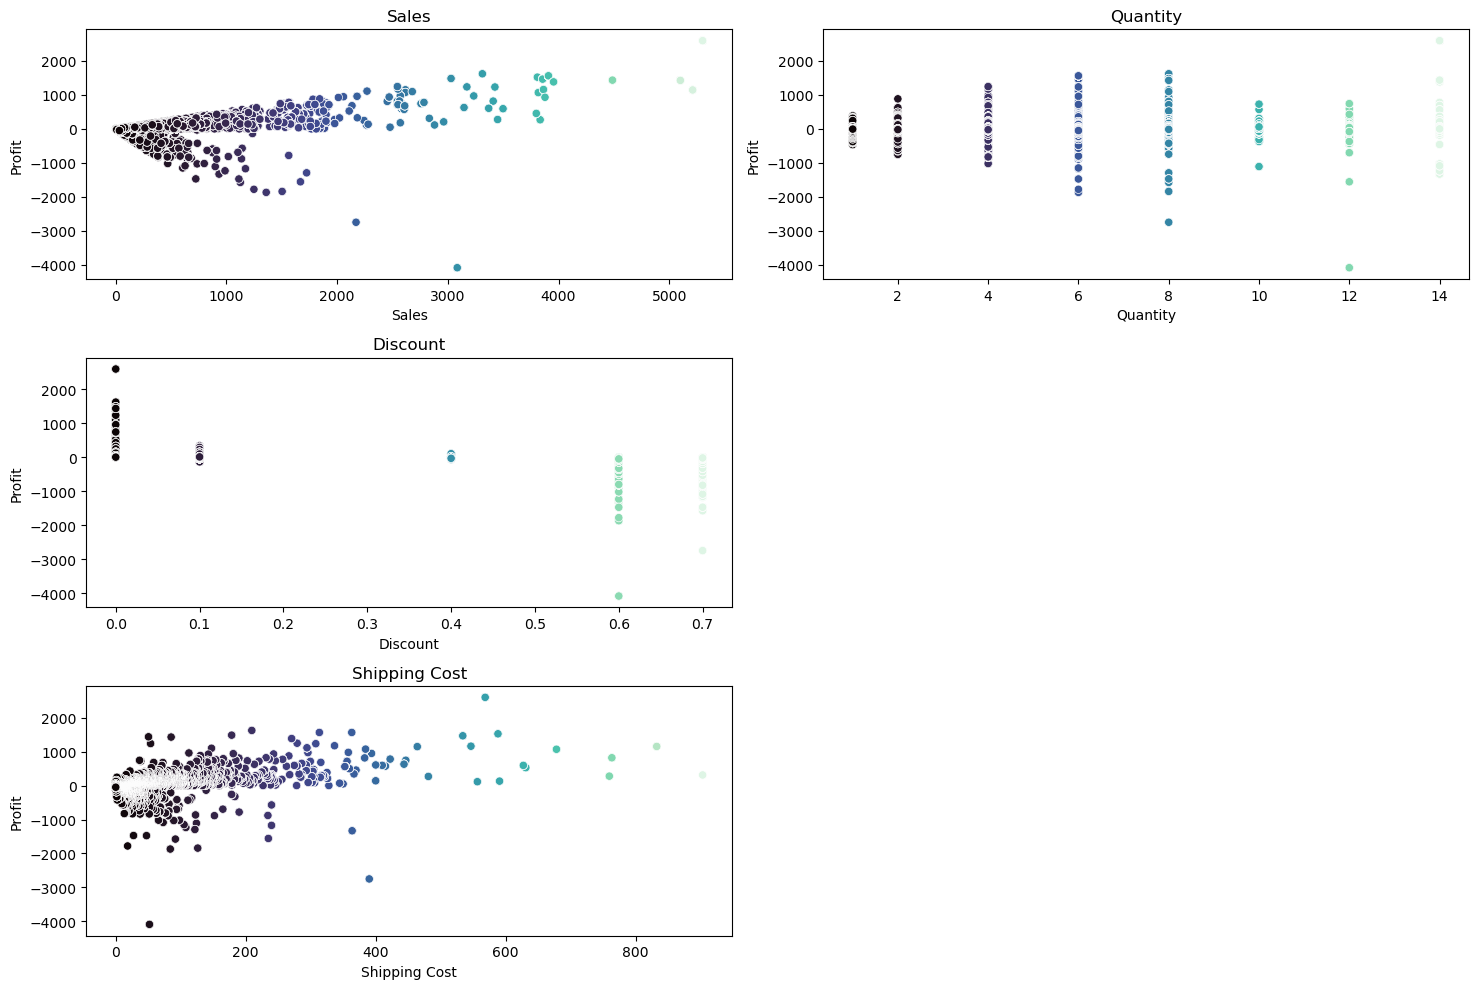

In [39]:
pre.relacion_vr_numericas(numericas,"Profit")

# Conclusiones
- Sales está altamente relacionado con Profit, vamos a eliminarla
- Discount y Quantity son escalonadas por que tienen valores muy exactos, podrían volverse categóricas

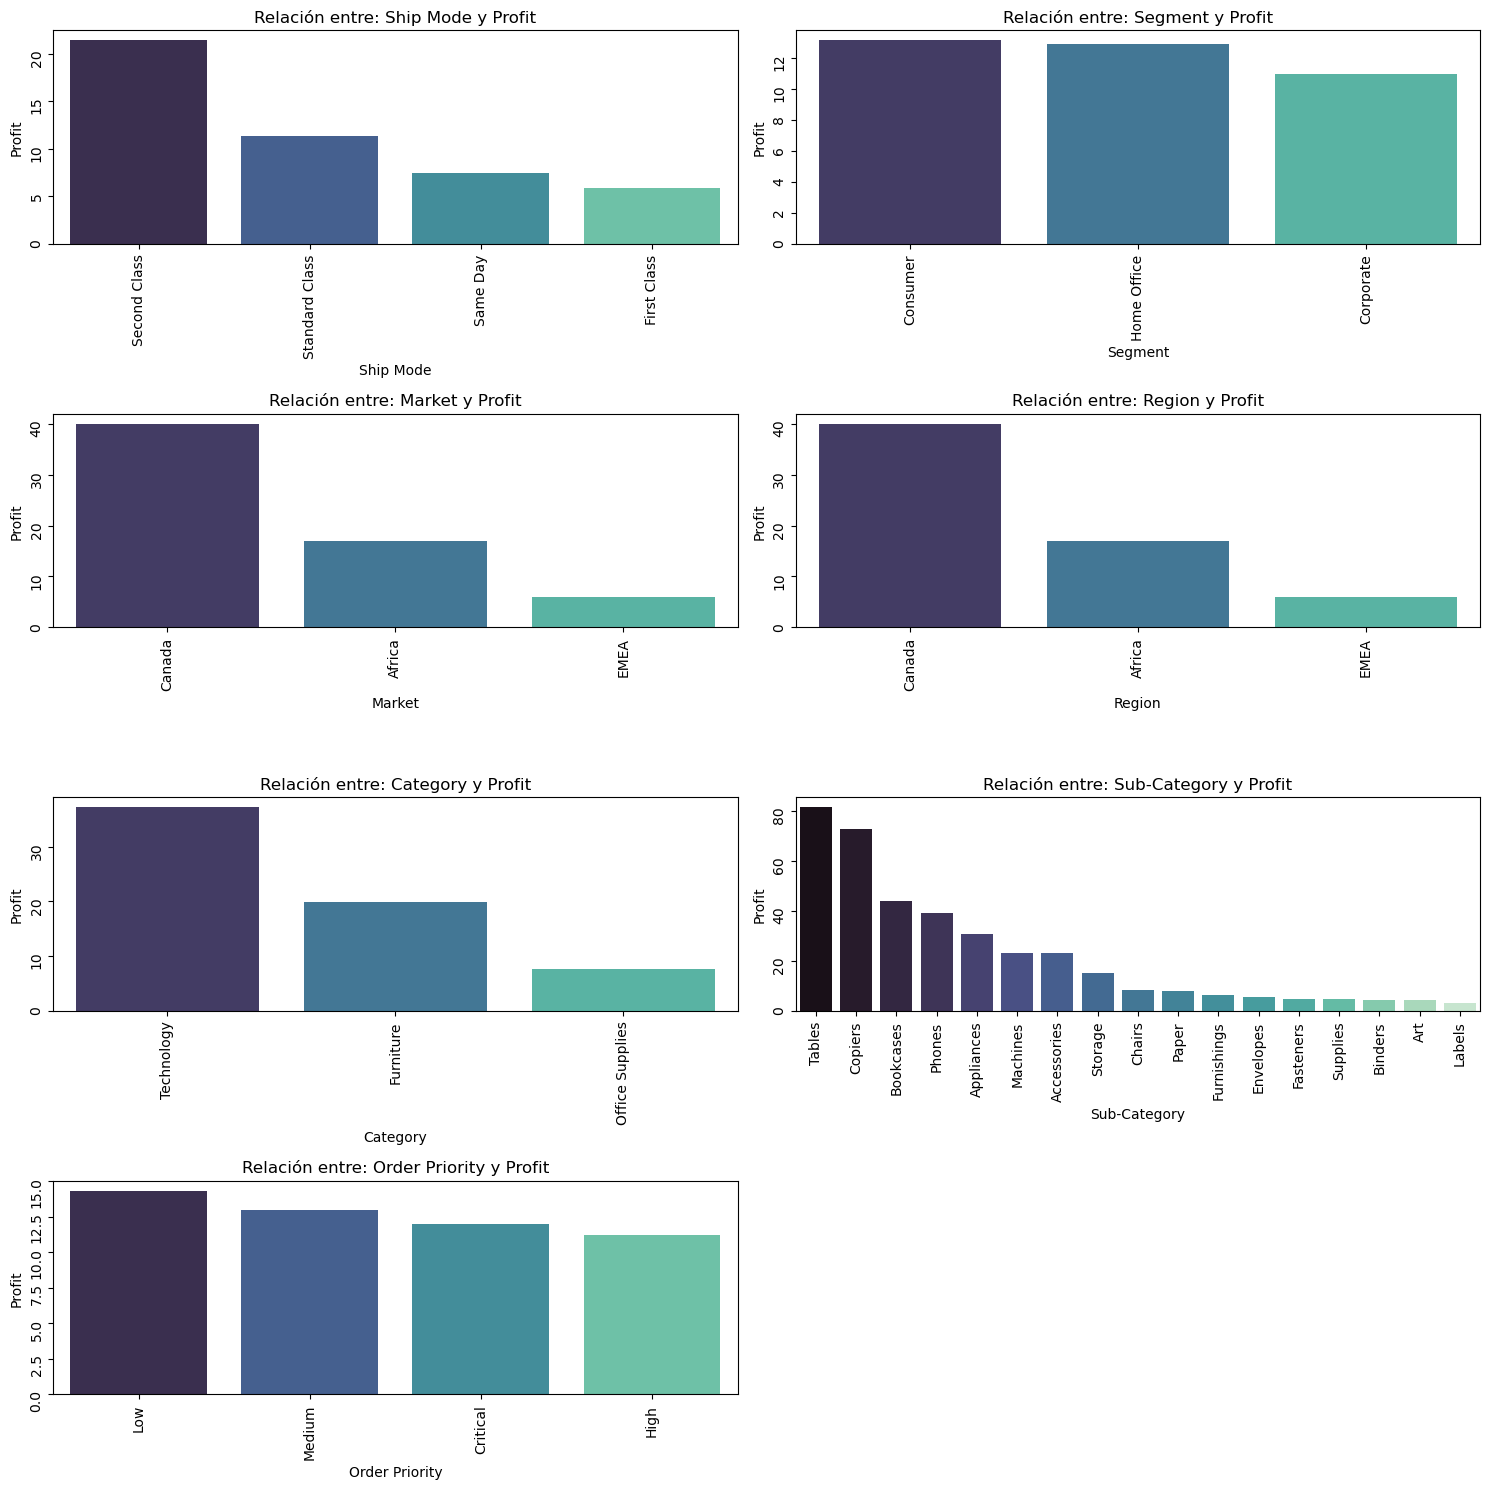

In [40]:
pre.relacion_vr_categoricas(df,"Profit",grafica_size=(15,15))

# Conclusiones
- No muchas parecen tener orden
- Parece ser que la subcategoría "Tables" sólo genera pérdidas
- El resto parece generar buen profit

# Eliminar "Sales"
- Al tener tanta relación con Profit podemos quitarla

In [41]:
df.drop(columns="Sales",inplace=True)

# Convertir a category las categorías

In [42]:
for col in categoricas.columns:
    df[col] = df[col].astype("category")

# Guardamos los cambios

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78066 entries, 34 to 375252
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Ship Mode       78066 non-null  category
 1   Segment         78066 non-null  category
 2   Market          78066 non-null  category
 3   Region          78066 non-null  category
 4   Category        78066 non-null  category
 5   Sub-Category    78066 non-null  category
 6   Quantity        78066 non-null  int64   
 7   Discount        78066 non-null  float64 
 8   Profit          78066 non-null  float64 
 9   Shipping Cost   78066 non-null  float64 
 10  Order Priority  78066 non-null  category
dtypes: category(7), float64(3), int64(1)
memory usage: 3.5 MB


In [44]:
df.to_pickle("../../../datos/02_regresiones/cluster_1/02_datos_gestionados.pkl")